## 任务三：股东分析

- 股东投资行为特征分析
     - 计算每个股东的投资集中度（持股公司数量、行业分布）
     - 分析股东的投资偏好（偏好行业、市值规模、成长性等）
     - 计算股东的换手率和持股周期
- 股东投资能力评估与归因分析
     - 构建 股东投资能力评分体系（收益率、稳定性、选股能力等）
     - 计算股东的 超额收益（相对于市场基准）
     - 识别明星股东和问题股东

#### 股东的投资偏好度

In [62]:
import pandas as pd
import numpy as np
from datetime import datetime


In [63]:
%reload_ext autoreload
%autoreload 2

import importlib

import industry_mapper as im

hangyeshuju = pd.read_csv('data/全部A股基本资料.csv', encoding = 'utf-8-sig')
hangyeshuju = hangyeshuju.rename(columns={'证券代码':'ts_code'})
print(hangyeshuju.tail(10))
mapper = im.IndustryMapper()
result = mapper.map_industry_data(hangyeshuju, business_column='主营产品类型', ts_code_column='ts_code')
print("行业映射结果:")
print(result.tail(10))
hangyeshuju_with_industry = mapper.add_industry_column(hangyeshuju, business_column='主营产品类型', new_column='行业', format ='list')
hangyeshuju_with_industry[['主营产品类型', '行业']].head(10)


        ts_code  证券简称  股票简称        上市日期 上市地点  上市板  \
5344  873706.BJ  铁拓机械  铁拓机械  2024-03-08   北京   北证   
5345  873726.BJ  卓兆点胶  卓兆点胶  2023-10-19   北京   北证   
5346  873806.BJ   云星宇   云星宇  2024-01-11   北京   北证   
5347  873833.BJ  美心翼申  美心翼申  2023-11-08   北京   北证   
5348  920002.BJ  万达轴承  万达轴承  2024-05-30   北京   北证   
5349  920008.BJ  成电光信  成电光信  2024-08-29   北京   北证   
5350  920016.BJ  中草香料  中草香料  2024-09-13   北京   北证   
5351  920118.BJ  太湖远大  太湖远大  2024-08-22   北京   北证   
5352        NaN   NaN   NaN         NaN  NaN  NaN   
5353  数据来源：Wind   NaN   NaN         NaN  NaN  NaN   

                                                 主营产品名称               主营产品类型  \
5344                         沥青混合料厂拌热再生设备、铁拓机械沥青厂拌热再生设备             专用设备与零部件   
5345  点胶阀及阀体控制器、点胶平台及运动控制系统、卓兆点胶单液螺杆阀(SPEN系列)、卓兆点胶多功...             专用设备与零部件   
5346                 云星宇商品销售及其他、云星宇智慧交通技术服务、云星宇智慧交通系统集成   IT产品销售、公共服务、系统集成服务   
5347                   美心翼申摩托车曲轴以及配件、美心翼申通机曲轴、美心翼申压缩机曲轴  摩托车发动机配件、通机配件、压缩机配件   
5348  万达轴承P5级精密转

,主营产品类型,行业
0,存贷款业务、国际业务、机构业务、结算业务、人民币理财、外汇理财、银行卡、证券业务,[金融]
1,住宅楼盘,[房地产]
2,网络游戏,[信息技术]
3,商业地产、住宅楼盘,[房地产]
4,酒店、住宅楼盘,[房地产]
5,系统集成服务、专业咨询服务、专用设备与零部件,"[机械设备, 汽车, 商业服务]"
6,百货商场、大型购物中心、动物类中药制剂、度假村、酒店、开发区园区、连锁药店、旅游景点、木地板...,"[休闲服务, 房地产, 商业贸易, 医药生物, 农林牧渔]"
7,风泵机械、民用建筑、燃气,"[机械设备, 公用事业, 能源]"
8,物业出租和管理、长途客运、住宅楼盘,[房地产]
9,半导体材料、半导体太阳能光伏、玻璃、磁性材料、低压电器类、电子元器件,"[电器, 信息技术, 原材料, 能源]"


In [64]:
hangyeshuju1 = pd.read_csv('data/全部A股基本资料.csv', encoding = 'utf-8-sig')
hangyeshuju1 = hangyeshuju1.rename(columns={'证券代码':'ts_code'})

hangyeshuju_with_industry = mapper.add_industry_column(hangyeshuju1, business_column='主营产品类型', new_column='industry_list', format ='list')
hangyeshuju_with_industry.rename(columns={'主营产品类型':'business_category'}, inplace=True)
hangyeshuju_with_industry.to_csv('data/全部A股基本资料_含行业.csv', index = False, encoding = 'utf-8-sig')

In [90]:
%reload_ext autoreload
%autoreload 2

In [66]:
result = mapper.get_industry_statistics(hangyeshuju_with_industry, business_column = '主营产品类型', with_industry=1)
print(result)

{'raw_industry_distribution': {'机械设备': 1756, '信息技术': 1060, '汽车': 1050, '其他': 1011, '原材料': 618, '商业服务': 501, '医药生物': 315, '公用事业': 297, '房地产': 290, '食品饮料': 254, '交通运输': 173, '能源': 170, '纺织服装': 137, '金融': 128, '传媒': 113, '商业贸易': 102, '电器': 77, '航空航天与国防': 67, '家用电器': 50, '农林牧渔': 45, '消费电子': 32, '休闲服务': 31, '未知': 23}, 'weighted_industry_distribution': {'交通运输': 106.06666666666666, '休闲服务': 18.266666666666666, '传媒': 75.51666666666667, '信息技术': 719.6083333333333, '公用事业': 149.73333333333332, '其他': 1011.0, '农林牧渔': 22.816666666666666, '医药生物': 231.83333333333334, '原材料': 443.1583333333333, '商业服务': 313.325, '商业贸易': 54.125, '家用电器': 27.625, '房地产': 185.6, '未知': 23.0, '机械设备': 943.7583333333333, '汽车': 496.575, '消费电子': 11.05, '电器': 39.083333333333336, '纺织服装': 99.7, '能源': 70.575, '航空航天与国防': 31.433333333333334, '金融': 90.28333333333333, '食品饮料': 188.86666666666667}, 'total_companies': 5354, 'multi_industry_companies': 2135, 'multi_industry_ratio': 0.3987672768023907, 'other_industry_ratio': 0.12180722891566265,

In [67]:
# 假设数据已经加载到df中
df = pd.read_csv('data/top10_holders.csv', encoding = 'gbk')


In [68]:
# 数据预处理
def preprocess_data(df):
    """数据预处理：日期格式统一，行业/板块分类"""
    # 确保日期列是datetime格式
    df['ann_date'] = pd.to_datetime(df['ann_date'])
    df['end_date'] = pd.to_datetime(df['end_date'])
    
    # 根据股票代码前缀判断行业/板块
    def get_market_category(ts_code):
        prefix = ts_code[:3]
        if prefix == '000':
            return '主板'
        elif prefix == '002':
            return '中小板'
        elif prefix == '300':
            return '创业板'
        elif prefix == '688':
            return '科创板'
        else:
            return '其他'
    
    df['market_category'] = df['ts_code'].apply(get_market_category)
    
    return df


In [69]:
preprocess_data(df)

,Unnamed: 0,ts_code,ann_date,end_date,holder_name,hold_amount,hold_ratio,rowid,market_category
0,0,000001.SZ,2022-08-18,2022-06-30,北京银行股份有限公司-景顺长城景颐双利债券型证券投资基金,4.393010e+07,0.23,1,主板
1,1,000001.SZ,2022-08-18,2022-06-30,交通银行股份有限公司-易方达上证50指数增强型证券投资基金,6.114350e+07,0.32,1,主板
2,2,000001.SZ,2022-08-18,2022-06-30,瑞银资产管理(新加坡)有限公司-瑞银卢森堡投资SICAV,4.735370e+07,0.24,1,主板
3,3,000001.SZ,2022-08-18,2022-06-30,深圳中电投资股份有限公司,6.252340e+07,0.32,1,主板
4,4,000001.SZ,2022-08-18,2022-06-30,香港中央结算有限公司(陆股通),1.771590e+09,9.13,1,主板
...,...,...,...,...,...,...,...,...,...
2093496,2093496,873223.BJ,2019-04-02,2019-04-02,海盐金亿管理咨询有限公司,6.000000e+06,10.00,1,其他
2093497,2093497,873223.BJ,2019-04-30,2018-12-31,唐旭文,5.400000e+07,90.00,1,其他
2093498,2093498,873223.BJ,2019-04-30,2018-12-31,海盐金亿管理咨询有限公司,6.000000e+06,10.00,1,其他
2093499,2093499,873223.BJ,2018-11-30,2018-11-30,海盐金亿管理咨询有限公司,6.000000e+06,10.00,1,其他


In [80]:
df.loc[(df['holder_name']=='香港中央结算有限公司(陆股通)') & (df['ts_code']=='601009.SH') & (df['end_date'].astype(str).str.replace('-','')=='20220331'), 'hold_amount'] = 2392.24

In [ ]:
df['end_date'] = pd.to_datetime(df['end_date'], errors='coerce')
df = df[df['end_date'] == pd.Timestamp('2022-03-31')]


In [82]:
print(df)

         Unnamed: 0    ts_code   ann_date   end_date  \
10               10  000001.SZ 2022-04-27 2022-03-31   
11               11  000001.SZ 2022-04-27 2022-03-31   
12               12  000001.SZ 2022-04-27 2022-03-31   
13               13  000001.SZ 2022-04-27 2022-03-31   
14               14  000001.SZ 2022-04-27 2022-03-31   
...             ...        ...        ...        ...   
2093295     2093295  873169.BJ 2022-04-30 2022-03-31   
2093296     2093296  873169.BJ 2022-04-30 2022-03-31   
2093297     2093297  873169.BJ 2022-04-30 2022-03-31   
2093298     2093298  873169.BJ 2022-04-30 2022-03-31   
2093299     2093299  873169.BJ 2022-04-30 2022-03-31   

                              holder_name   hold_amount  hold_ratio  rowid  \
10          交通银行股份有限公司-易方达上证50指数增强型证券投资基金  6.114350e+07      0.3200      1   
11                           深圳中电投资股份有限公司  6.252340e+07      0.3200      1   
12                        香港中央结算有限公司(陆股通)  1.630010e+09      8.4000      1   
13       新华人寿保险

=== 股东行业投资分析开始 ===
股东数据形状: (48191, 9)
行业数据形状: (5354, 44)
行业数据列: ['ts_code', '证券简称', '股票简称', '上市日期', '上市地点', '上市板', '主营产品名称', 'business_category', '经营范围', '省份', '城市', '注册地址', '董事长\n[交易日期] 最新', '总经理\n[交易日期] 最新', '董事会秘书\n[交易日期] 最新', '证券事务代表\n[交易日期] 最新', '财务总监\n[交易日期] 最新', '公司独立董事(现任)', '公司独立董事(历任)', '公司董事', '核心技术人员人数\n[交易日期] 最新', '高管人数\n[交易日期] 最新收盘日', '生产人员人数\n[交易日期] 最新收盘日', '销售人员人数\n[交易日期] 最新收盘日', '客服人员人数\n[交易日期] 最新收盘日', '技术人员人数\n[交易日期] 最新收盘日', '财务人员人数\n[交易日期] 最新收盘日', '行政人员人数\n[交易日期] 最新收盘日', '人事人员人数\n[交易日期] 最新收盘日', '生产人员人数占比\n[交易日期] 最新收盘日', '销售人员人数占比\n[交易日期] 最新收盘日', '客服人员人数占比\n[交易日期] 最新收盘日', '技术人员人数占比\n[交易日期] 最新收盘日', '财务人员人数占比\n[交易日期] 最新收盘日', '人事人员人数占比\n[交易日期] 最新收盘日', '行政人员人数占比\n[交易日期] 最新收盘日', '博士人数占比\n[交易日期] 最新收盘日', '硕士人数占比\n[交易日期] 最新收盘日', '本科人数占比\n[交易日期] 最新收盘日', '专科人数占比\n[交易日期] 最新收盘日', '高中及以下人数占比\n[交易日期] 最新收盘日', '其他学历人数占比\n[交易日期] 最新收盘日', '员工总数\n[交易日期] 最新', 'industry_list']
✓ 检测到 industry_list 列，跳过行业映射步骤

分析特定股东: ['香港中央结算有限公司(陆股通)']
identified target holder: 香港中央结算有限公司(陆股通)
分析股东 '香港中央结算

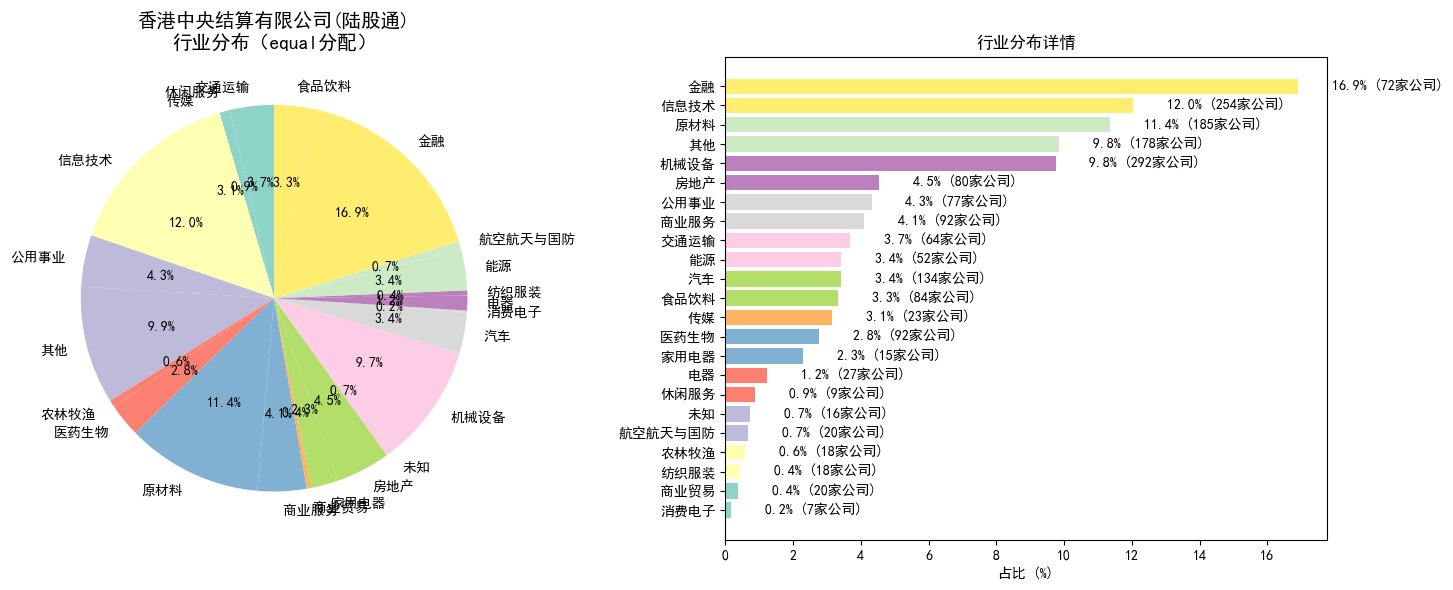


生成前10大股东的行业集中度报告...
生成前10大股东的行业集中度报告...
分析股东 '法国巴黎银行' 的行业分布...
持股公司数量: 1
总资金数量: 1,394,112,720,000.0 元


分析股东 '南京紫金投资集团有限责任公司' 的行业分布...
持股公司数量: 4
总资金数量: 1,265,048,494,810.0 元


分析股东 '南京紫金投资集团有限责任公司' 的行业分布...
持股公司数量: 4
总资金数量: 1,265,048,494,810.0 元


分析股东 '江苏交通控股有限公司' 的行业分布...
持股公司数量: 6
总资金数量: 1,004,773,739,120.0 元


分析股东 '江苏交通控股有限公司' 的行业分布...
持股公司数量: 6
总资金数量: 1,004,773,739,120.0 元


分析股东 '南京高科股份有限公司' 的行业分布...
持股公司数量: 2
总资金数量: 1,002,829,844,000.0 元


分析股东 '南京高科股份有限公司' 的行业分布...
持股公司数量: 2
总资金数量: 1,002,829,844,000.0 元


分析股东 '香港中央结算(代理人)有限公司' 的行业分布...
持股公司数量: 142
总资金数量: 667,172,069,410.0 元


分析股东 '香港中央结算(代理人)有限公司' 的行业分布...
持股公司数量: 142
总资金数量: 667,172,069,410.0 元


分析股东 '中央汇金投资有限责任公司' 的行业分布...
持股公司数量: 8
总资金数量: 605,373,351,000.0 元


分析股东 '中央汇金投资有限责任公司' 的行业分布...
持股公司数量: 8
总资金数量: 605,373,351,000.0 元


分析股东 '中国烟草总公司江苏省公司(江苏省烟草公司)' 的行业分布...
持股公司数量: 2
总资金数量: 394,097,823,310.0 元


分析股东 '中国烟草总公司江苏省公司(江苏省烟草公司)' 的行业分布...
持股公司数量: 2
总资金数量: 394,097,823,310.0 元


分析股东 '中国证券金融股份有限公司' 的行业分布...
持股公司数量: 159
总资

In [83]:
import shareholder_analyzer as shan
analyzer = shan.ShareholderAnalyzer()

results = analyzer.run_complete_analysis(
        df, 
        hangyeshuju_with_industry, 
        target_holders=['香港中央结算有限公司(陆股通)'],
        top_n=10
    )

In [84]:
df = pd.read_csv('data/top10_holders.csv', encoding = 'gbk')
preprocess_data(df)

,Unnamed: 0,ts_code,ann_date,end_date,holder_name,hold_amount,hold_ratio,rowid,market_category
0,0,000001.SZ,2022-08-18,2022-06-30,北京银行股份有限公司-景顺长城景颐双利债券型证券投资基金,4.393010e+07,0.23,1,主板
1,1,000001.SZ,2022-08-18,2022-06-30,交通银行股份有限公司-易方达上证50指数增强型证券投资基金,6.114350e+07,0.32,1,主板
2,2,000001.SZ,2022-08-18,2022-06-30,瑞银资产管理(新加坡)有限公司-瑞银卢森堡投资SICAV,4.735370e+07,0.24,1,主板
3,3,000001.SZ,2022-08-18,2022-06-30,深圳中电投资股份有限公司,6.252340e+07,0.32,1,主板
4,4,000001.SZ,2022-08-18,2022-06-30,香港中央结算有限公司(陆股通),1.771590e+09,9.13,1,主板
...,...,...,...,...,...,...,...,...,...
2093496,2093496,873223.BJ,2019-04-02,2019-04-02,海盐金亿管理咨询有限公司,6.000000e+06,10.00,1,其他
2093497,2093497,873223.BJ,2019-04-30,2018-12-31,唐旭文,5.400000e+07,90.00,1,其他
2093498,2093498,873223.BJ,2019-04-30,2018-12-31,海盐金亿管理咨询有限公司,6.000000e+06,10.00,1,其他
2093499,2093499,873223.BJ,2018-11-30,2018-11-30,海盐金亿管理咨询有限公司,6.000000e+06,10.00,1,其他


In [ ]:
df['end_date'] = pd.to_datetime(df['end_date'], errors='coerce')
df = df[df['end_date'] <= pd.Timestamp('2022-06-30')]


In [ ]:
df.loc[(df['holder_name']=='香港中央结算有限公司(陆股通)') & (df['ts_code']=='601009.SH') & (pd.to_datetime(df['end_date'])==pd.Timestamp('2022-03-31')), 'hold_amount'] = 2392.24


In [96]:
%reload_ext autoreload
%autoreload 2

=== 开始分析股东 '香港中央结算有限公司(陆股通)' 的成长性 ===
计算股东 '香港中央结算有限公司(陆股通)' 的换手率...
计算股东 '香港中央结算有限公司(陆股通)' 的持股周期...
计算股东 '香港中央结算有限公司(陆股通)' 的持股周期...
分析股东 '香港中央结算有限公司(陆股通)' 的行业集中度趋势...
分析股东 '香港中央结算有限公司(陆股通)' 的行业集中度趋势...


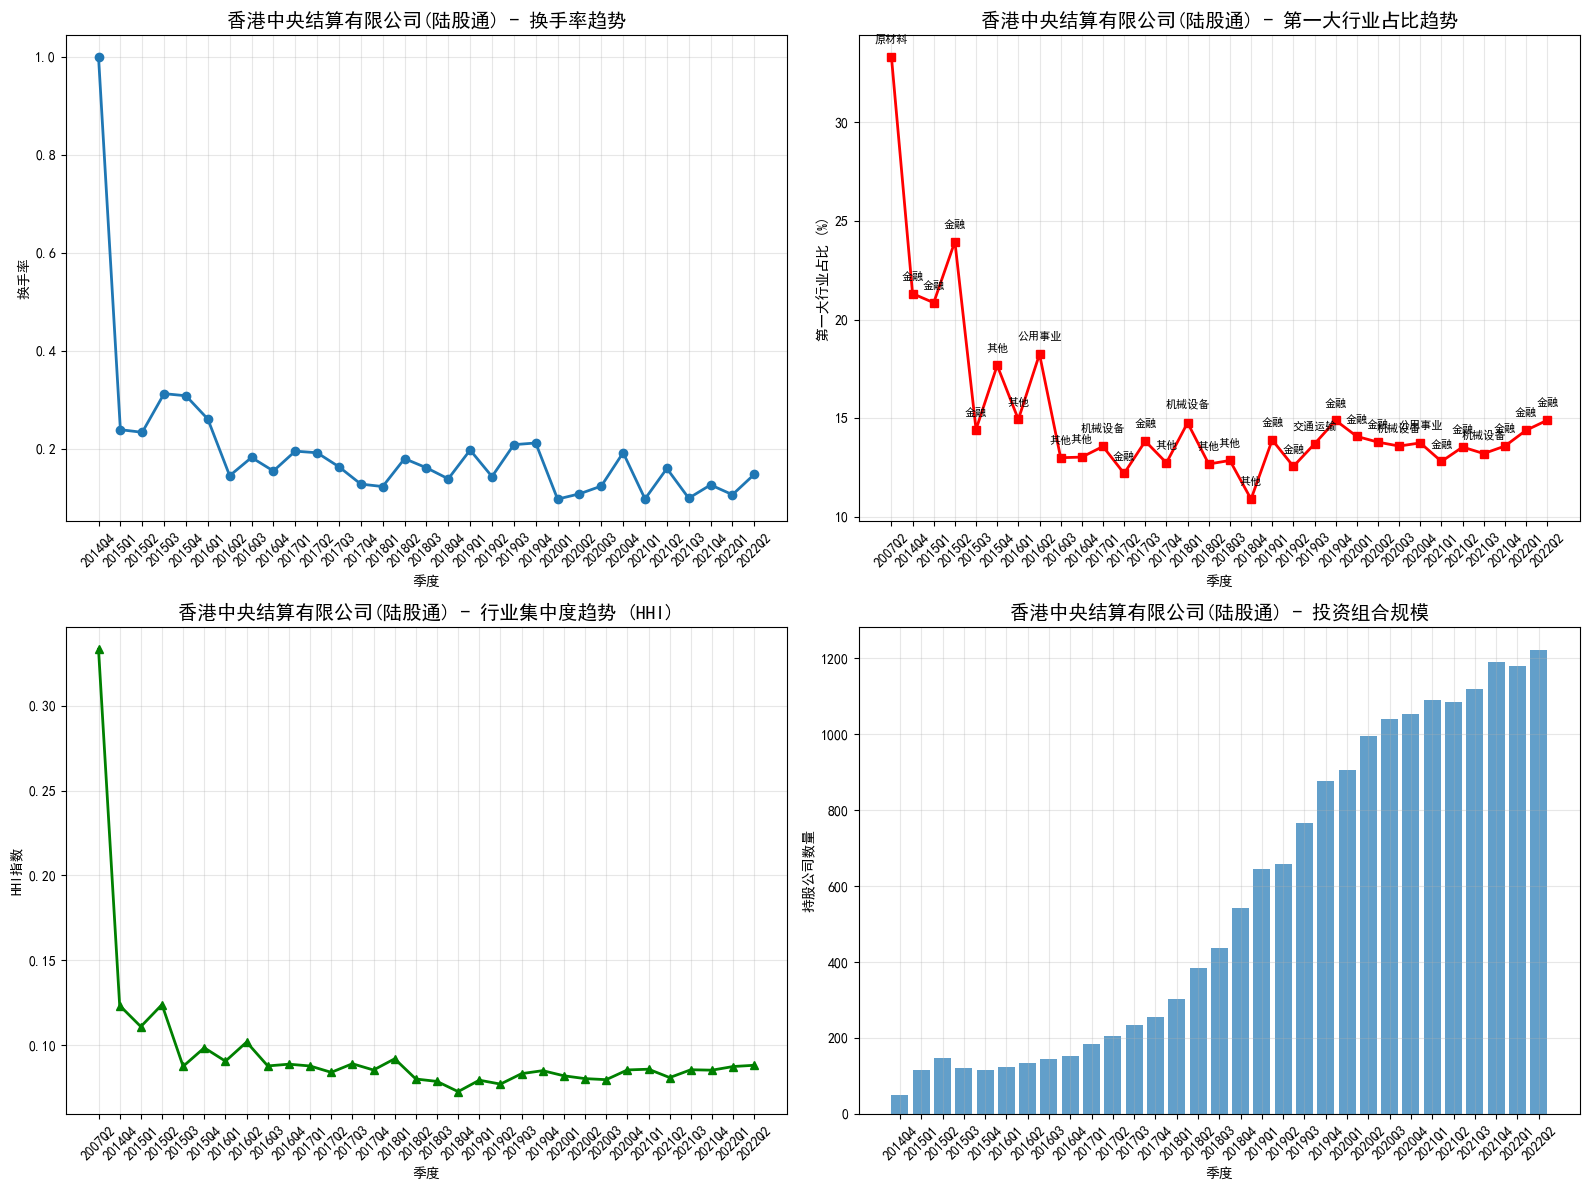


股东 '香港中央结算有限公司(陆股通)' 成长性分析总结
平均换手率: 19.80%
最高换手率: 100.00% (季度: 2014Q4)
最低换手率: 9.74% (季度: 2020Q1)

持股周期分析:
平均持股天数: 1111 天
平均持股季度: 11.7 个季度
最长持股: 5479 天
分析股票数量: 1619 只

行业投资趋势:
初期第一大行业: 原材料 (33.3%)
近期第一大行业: 金融 (14.9%)
行业集中度变化: 0.333 → 0.088
行业切换次数: 5
=== 股东 '香港中央结算有限公司(陆股通)' 成长性分析完成 ===


In [98]:
# 导入成长性分析器
from shareholder_analyzer import ShareholderGrowthAnalyzer, create_growth_analyzer

# 创建分析器
growth_analyzer = ShareholderGrowthAnalyzer()

# 分析特定股东的成长性
results = growth_analyzer.run_complete_growth_analysis(
    df,  # 股东持股数据（需要包含时间序列）
    hangyeshuju_with_industry,  # 行业数据
    "香港中央结算有限公司(陆股通)"  # 要分析的股东
)


In [99]:
from shareholder_analyzer import ShareholderGrowthAnalyzer, create_growth_analyzer

# 创建分析器
growth_analyzer = ShareholderGrowthAnalyzer()
# 或者单独使用各个功能
# 1. 计算换手率
turnover_df = growth_analyzer.calculate_turnover_rate(df, "香港中央结算有限公司(陆股通)")
print(turnover_df.head())

计算股东 '香港中央结算有限公司(陆股通)' 的换手率...
  quarter  turnover_rate  new_stocks_count  sold_stocks_count  portfolio_size  \
0  2014Q4       1.000000                50                  1              50   
1  2015Q1       0.239046                76                 11             115   
2  2015Q2       0.233709                64                 31             148   
3  2015Q3       0.312582                40                 67             121   
4  2015Q4       0.308232                46                 52             115   

    total_value  
0  3.745734e+09  
1  5.422944e+09  
2  6.439458e+09  
3  5.393283e+09  
4  3.954098e+09  


In [100]:
# 2. 计算持股周期
holding_stats, holding_df = growth_analyzer.calculate_holding_period(df, "香港中央结算有限公司(陆股通)")
print(holding_stats)
print(holding_df.head(50))

计算股东 '香港中央结算有限公司(陆股通)' 的持股周期...
{'avg_holding_days': 1110.9054972205065, 'median_holding_days': 1004.0, 'avg_holding_quarters': 11.700432365657813, 'median_holding_quarters': 10.0, 'total_stocks_analyzed': 1619, 'longest_holding_days': 5479, 'shortest_holding_days': 0}
      ts_code  holding_days  holding_quarters first_quarter last_quarter
0   000001.SZ          1734                20    2017-09-30   2022-06-30
1   000002.SZ          1277                15    2018-12-31   2022-06-30
2   000005.SZ           274                 3    2017-06-30   2018-03-31
3   000006.SZ           821                10    2019-12-31   2022-03-31
4   000008.SZ           821                 9    2020-03-31   2022-06-30
5   000009.SZ          1552                18    2018-03-31   2022-06-30
6   000011.SZ          1187                 9    2019-03-31   2022-06-30
7   000012.SZ           731                 9    2019-12-31   2021-12-31
8   000016.SZ          1187                 8    2019-03-31   2022-06-30


In [101]:
# 3. 分析行业趋势
industry_trend = growth_analyzer.analyze_industry_concentration_trend(df, hangyeshuju_with_industry, "香港中央结算有限公司(陆股通)")

print(industry_trend.head())

分析股东 '香港中央结算有限公司(陆股通)' 的行业集中度趋势...
  quarter top_industry  top_industry_percentage  top_industry_hold_amount  \
0  2007Q2          原材料                    33.33              1.018637e+09   
1  2014Q4           金融                    21.32              7.986525e+08   
2  2015Q1           金融                    20.86              1.141727e+09   
3  2015Q2           金融                    23.96              1.569630e+09   
4  2015Q3           金融                    14.43              7.833073e+08   

   hhi_index  industry_count  total_hold_amount  
0   0.333267               3       3.055910e+09  
1   0.123263              21       3.745734e+09  
2   0.110829              21       5.472495e+09  
3   0.123798              23       6.550262e+09  
4   0.087417              22       5.426860e+09  
  quarter top_industry  top_industry_percentage  top_industry_hold_amount  \
0  2007Q2          原材料                    33.33              1.018637e+09   
1  2014Q4           金融                    21.32 

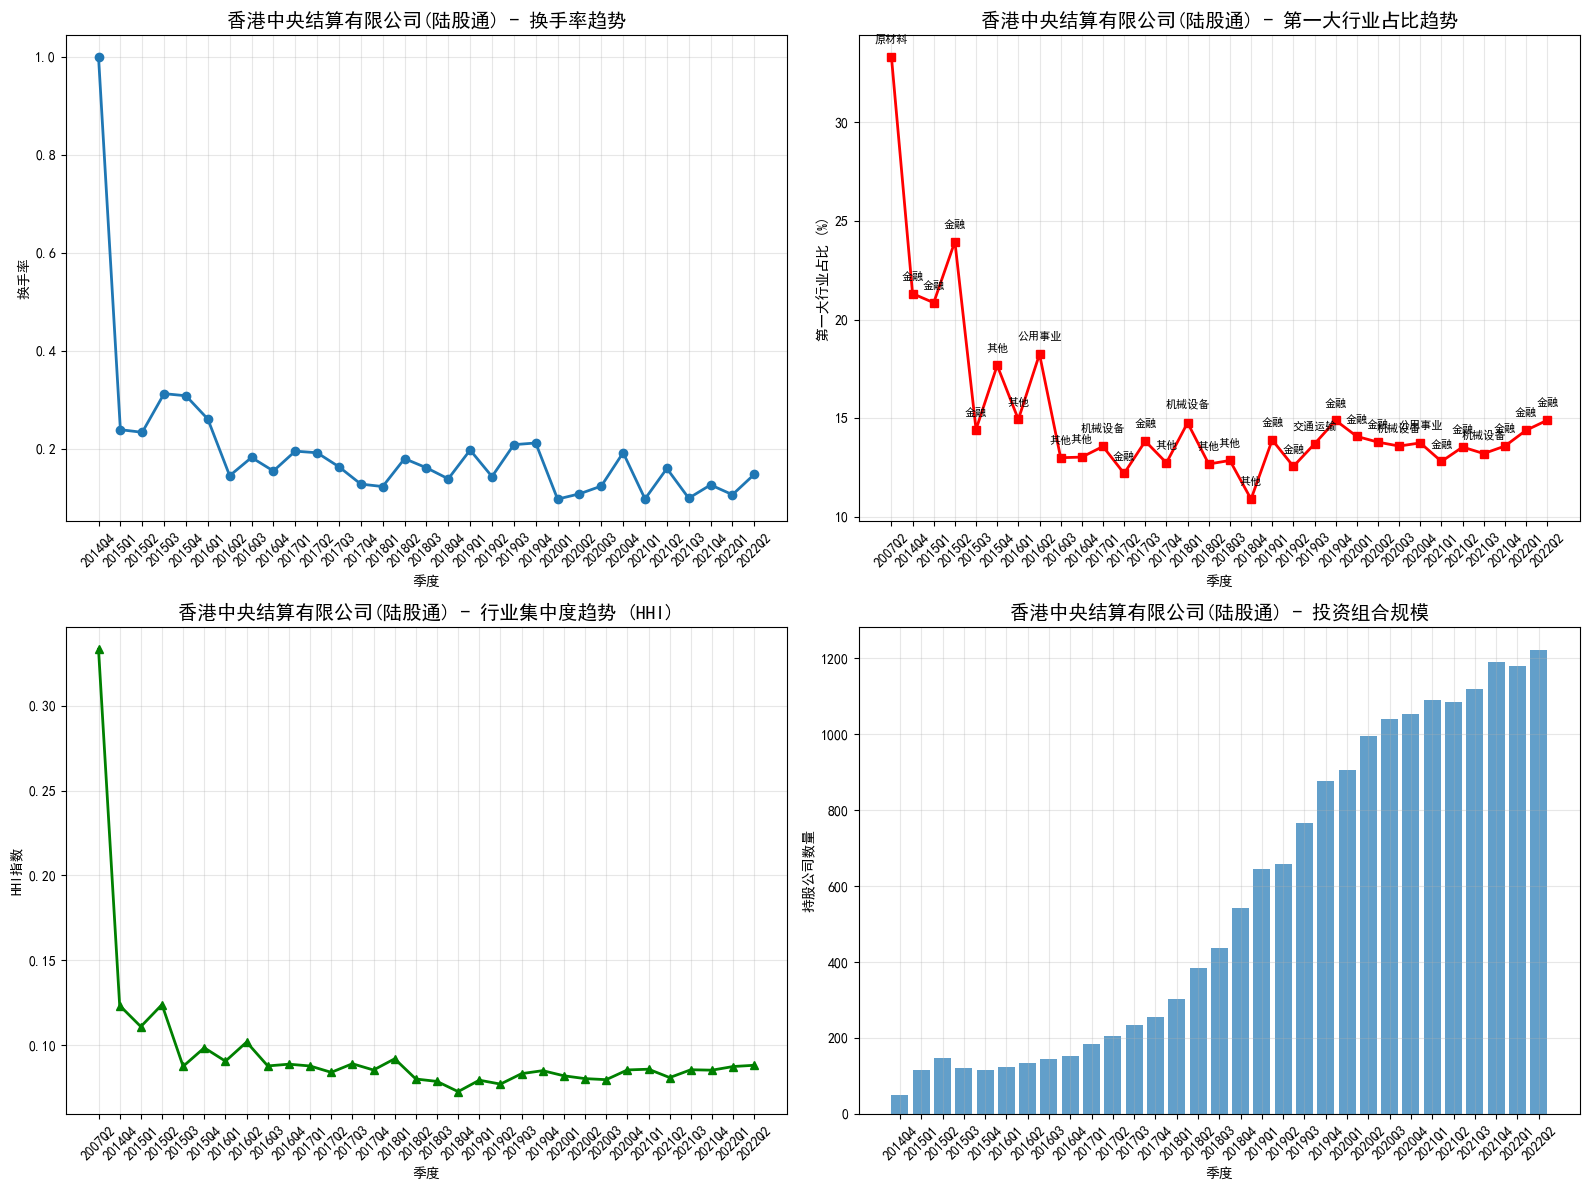

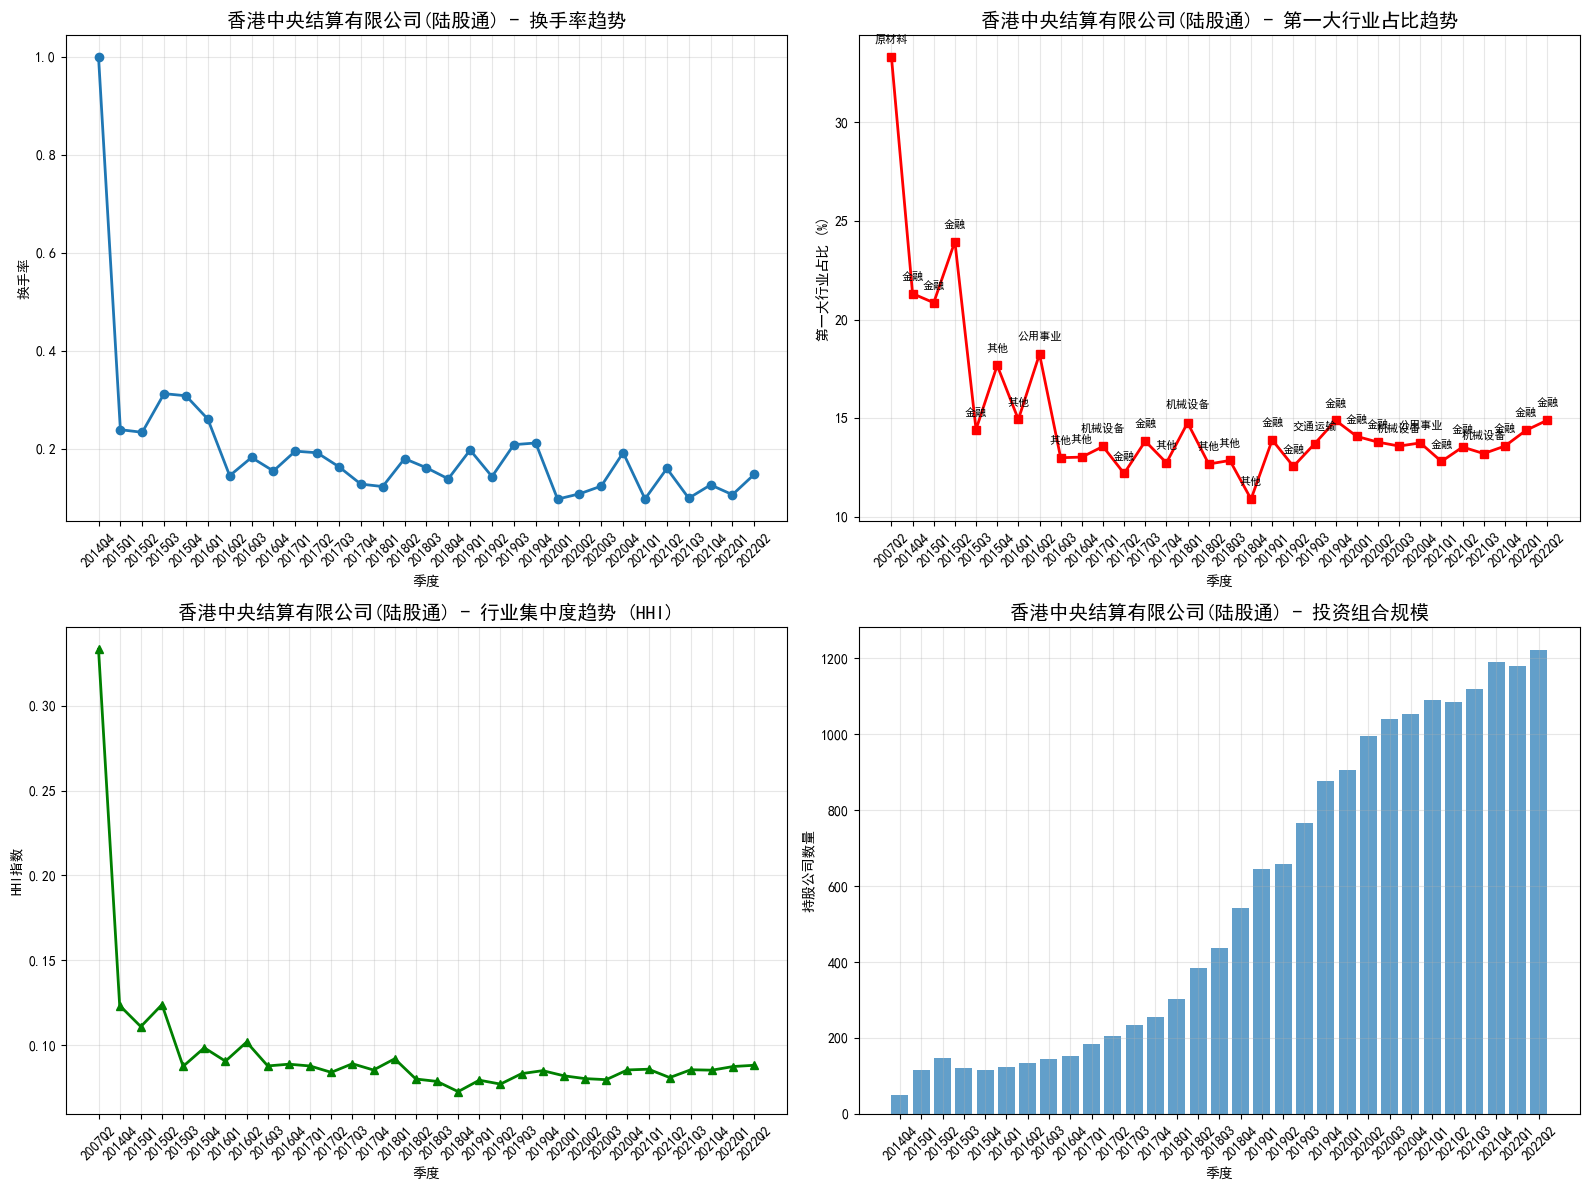

In [102]:
# 4. 绘制图表
growth_analyzer.plot_growth_analysis(turnover_df, industry_trend, "香港中央结算有限公司(陆股通)")

- 下面进行股东投资能力评估与归因分析
    - 构建 股东投资能力评分体系（收益率、稳定性、选股能力等）
    - 计算股东的 超额收益（相对于市场基准）
    - 识别明星股东和问题股东


In [107]:
import duckdb as db

conn = db.connect('data/stockdatabase.db')

print(conn.execute("SHOW TABLES;").fetchall())

daily = conn.execute("SELECT * FROM daily;").fetchdf()

print(daily.iloc[60:70])

print(daily.columns)


s = daily['code']
try: 
    index = s[s == 'bj.830779'].index[0]
    print(f"元素第一次出现的索引: {index}")
except IndexError:
    print("元素不在Series中")

# 只有上证深证数据，没有北证数据

daily['date'] = pd.to_datetime(daily['date'])
# 筛选季度端点日期（3-31, 6-30, 9-30, 12-31）
daily_quarterly = daily[
    ((daily['date'].dt.month == 3) & (daily['date'].dt.day == 31)) |
    ((daily['date'].dt.month == 6) & (daily['date'].dt.day == 30)) |
    ((daily['date'].dt.month == 9) & (daily['date'].dt.day == 30)) |
    ((daily['date'].dt.month == 12) & (daily['date'].dt.day == 31))
]
daily_quarterly = daily_quarterly[['date', 'code', 'close']]
print(f"原始数据行数: {len(daily)}")
print(f"季度端点数据行数: {len(daily_quarterly)}")
print("\n季度端点数据样例:")
print(daily_quarterly.head())

daily_quarterly[daily_quarterly['code'] == 'sz.000001'].index[0]


[('adjust_factor',), ('assets_basic',), ('bao_fin',), ('daily',), ('daily_index',), ('industry_region',), ('other_basic',), ('parameter_description',), ('performance_express',), ('performance_forecast',), ('stk_managers',), ('top10_holders',)]


FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

         date       code       open       high        low  close   preclose  \
60 2000-02-22  sh.600000  25.879999  26.000000  24.600000  24.75  25.799999   
61 2000-02-23  sh.600000  24.600000  25.250000  24.500000  24.60  24.750000   
62 2000-02-24  sh.600000  24.600000  25.000000  24.500000  24.82  24.600000   
63 2000-02-25  sh.600000  24.900000  24.969999  24.500000  24.60  24.820000   
64 2000-02-28  sh.600000  24.600000  25.250000  24.350000  25.08  24.600000   
65 2000-02-29  sh.600000  25.209999  25.600000  24.799999  25.17  25.080000   
66 2000-03-01  sh.600000  25.200001  27.100000  25.170000  25.82  25.170000   
67 2000-03-02  sh.600000  25.780001  26.000000  25.100000  25.42  25.820000   
68 2000-03-03  sh.600000  25.600000  26.700001  25.580000  26.00  25.420000   
69 2000-03-06  sh.600000  26.480000  26.900000  25.549999  25.60  26.000000   

      volume        amount  adjustflag       turn  tradestatus    pctChg  \
60  10517512  2.640670e+08           3   2.629378     

7280606

In [108]:
a = conn.execute("SELECT * FROM performance_express;").fetchdf()
print(a.iloc[60:70])

print(a.columns)


         code performanceExpPubDate performanceExpStatDate  \
60  sh.600138            2012-03-28             2011-12-31   
61  sh.600138            2013-03-27             2012-12-31   
62  sh.600138            2014-04-15             2013-12-31   
63  sh.600138            2016-03-12             2015-12-31   
64  sh.600138            2018-02-13             2017-12-31   
65  sh.600163            2021-04-02             2020-12-31   
66  sh.600163            2022-03-12             2021-12-31   
67  sh.600189            2007-02-01             2006-12-31   
68  sh.600189            2007-08-08             2007-06-30   
69  sh.600189            2008-01-22             2007-12-31   

   performanceExpUpdateDate  performanceExpressTotalAsset  \
60               2012-03-28                  8.705477e+09   
61               2013-03-27                  7.866817e+09   
62               2014-04-15                  8.259774e+09   
63               2016-03-12                  9.563191e+09   
64          

市场基准我们将采用上证综指（000001.SH）、深证成指（000002.SH）作为对比基准。

In [ ]:
df = pd.read_csv('data/top10_holders.csv', encoding = 'gbk')
df['end_date'] = pd.to_datetime(df['end_date'], errors='coerce')
df = df[df['end_date'] <= pd.Timestamp('2022-06-30')]
df = df[df['end_date'] >= pd.Timestamp('2015-01-01')]
df.loc[(df['holder_name']=='香港中央结算有限公司(陆股通)') & (df['ts_code']=='601009.SH') & (df['end_date']==pd.Timestamp('2022-03-31')), 'hold_amount'] = 2392.24
print(df.head())
print(df.shape)


   Unnamed: 0    ts_code    ann_date    end_date  \
0           0  000001.SZ  2022-08-18  2022-06-30   
1           1  000001.SZ  2022-08-18  2022-06-30   
2           2  000001.SZ  2022-08-18  2022-06-30   
3           3  000001.SZ  2022-08-18  2022-06-30   
4           4  000001.SZ  2022-08-18  2022-06-30   

                     holder_name   hold_amount  hold_ratio  rowid  
0   北京银行股份有限公司-景顺长城景颐双利债券型证券投资基金  4.393010e+07        0.23      1  
1  交通银行股份有限公司-易方达上证50指数增强型证券投资基金  6.114350e+07        0.32      1  
2   瑞银资产管理(新加坡)有限公司-瑞银卢森堡投资SICAV  4.735370e+07        0.24      1  
3                   深圳中电投资股份有限公司  6.252340e+07        0.32      1  
4                香港中央结算有限公司(陆股通)  1.771590e+09        9.13      1  
(1211652, 8)


In [110]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [112]:
import shareholder_performance_analyzer
from shareholder_performance_analyzer import create_amount_analyzer

# 使用基于持股金额的分析器
amount_analyzer = create_amount_analyzer()

# 运行改进版分析
results_v2 = amount_analyzer.run_complete_analysis_v2(
    df_holdings = df,
    daily_quarterly = daily_quarterly,  # 季度股价数据
    industry_data = hangyeshuju_with_industry,
    top_holders = 200,  # 只分析前200大股东
    min_quarters = 8    # 至少8个季度的数据
)

# 查看结果（新版返回键：scored_data、classification_result）
if results_v2:
    scored_df = results_v2['scored_data']
    print("\n综合评分结果:")
    print(scored_df[[
        'holder_name', 'score', 'rating'
    ]].head(10))

    # 查看明星股东
    star_holders = results_v2['classification_result']['star_shareholders']
    print("\n明星股东详情:")
    print(star_holders[[
        'holder_name', 'score'
    ]].head(10))

    # 查看保存的CSV文件（由 save_results 输出到 outputs/）
    import os
    print("\n已生成文件:")
    for f in ['scored_data.csv','growth_metrics.csv','stability_metrics.csv','concentration_metrics.csv','consistency_metrics.csv']:
        p = os.path.join('outputs', f)
        print(f"- {p} {'✓' if os.path.exists(p) else '未找到'}")


=== 开始改进版股东投资能力分析 ===
筛选上证深证数据并选择前200大股东...
统一股票代码格式...
股票代码转换完成:
• 总股票数: 4906
• 上证股票: 2120
• 深证股票: 2676
上证深证股票数量: 5386
股票代码转换完成:
• 总股票数: 4906
• 上证股票: 2120
• 深证股票: 2676
上证深证股票数量: 5386
筛选后股东记录数: 1186510 (原记录数: 1211652)
2022-06-30
股东总数: 34677
最大持股股东: 香港中央结算(代理人)有限公司 (674,734,204,310.00元)
holder_name
香港中央结算(代理人)有限公司    6.747342e+11
中央汇金投资有限责任公司       6.053734e+11
中华人民共和国财政部         2.791390e+11
中国石油集团             1.468820e+11
香港中央结算有限公司(陆股通)    1.127880e+11
中国石油化工集团有限公司       8.426142e+10
中国邮政集团有限公司         6.247456e+10
中国电信集团有限公司         5.970415e+10
中国证券金融股份有限公司       5.423233e+10
中国中信有限公司           3.764859e+10
Name: hold_amount, dtype: float64
前200大股东记录数: 64178
涉及股票数量: 2419
最终分析 182 个符合条件的股东...
计算投资组合增长指标...
筛选后股东记录数: 1186510 (原记录数: 1211652)
2022-06-30
股东总数: 34677
最大持股股东: 香港中央结算(代理人)有限公司 (674,734,204,310.00元)
holder_name
香港中央结算(代理人)有限公司    6.747342e+11
中央汇金投资有限责任公司       6.053734e+11
中华人民共和国财政部         2.791390e+11
中国石油集团             1.468820e+11
香港中央结算有限公司(陆股通)    1.127880e+11
中国石油化工

In [ ]:
import pandas as pd
import numpy as np
from datetime import datetime


In [ ]:
def get_shareholder_top_holdings(df, holder_name, target_date, top_n=10):
    """
    获取某个股东在特定日期持有市值最高的前N家公司
    
    Parameters:
    df: 股东持股数据
    holder_name: 股东名称
    target_date: 目标日期 (格式: '2022-06-30' 或 '20220630')
    top_n: 前N家公司，默认10家
    
    Returns:
    DataFrame: 包含公司代码、持股市值、持股比例等信息
    """
    # 统一日期格式
    if isinstance(target_date, str):
        if '-' in target_date:
            target_date = target_date.replace('-', '')
    
    # 筛选特定股东和日期的数据
    filtered_data = df[
        (df['holder_name'] == holder_name) & 
        (df['end_date'] == target_date)
    ].copy()
    
    if filtered_data.empty:
        print(f"未找到股东 '{holder_name}' 在 {target_date} 的持股数据")
        return pd.DataFrame()
    
    # 按持股金额降序排列，取前N家
    top_holdings = filtered_data.nlargest(top_n, 'hold_amount').copy()
    
    # 计算总持股金额用于计算占比
    total_amount = filtered_data['hold_amount'].sum()
    
    # 添加在该股东组合中的占比
    top_holdings['portfolio_percentage'] = (top_holdings['hold_amount'] / total_amount * 100).round(2)
    
    # 重新排列列并格式化
    result = top_holdings[[
        'ts_code', 'hold_amount', 'hold_ratio', 'portfolio_percentage'
    ]].copy()
    
    # 添加排名
    result['rank'] = range(1, len(result) + 1)
    
    # 重新排列列的顺序
    result = result[['rank', 'ts_code', 'hold_amount', 'hold_ratio', 'portfolio_percentage']]
    
    # 重命名列
    result.columns = ['排名', '股票代码', '持股市值(元)', '持股比例(%)', '在组合中占比(%)']
    
    return result


def analyze_top_holdings_with_industry(df, hangyeshuju_with_industry, holder_name, target_date, top_n=10):
    """
    获取股东前N大持股并加入行业信息
    
    Parameters:
    df: 股东持股数据
    hangyeshuju_with_industry: 包含行业信息的公司数据
    holder_name: 股东名称
    target_date: 目标日期
    top_n: 前N家公司
    
    Returns:
    DataFrame: 包含行业信息的前N大持股
    """
    # 获取前N大持股
    top_holdings = get_shareholder_top_holdings(df, holder_name, target_date, top_n)
    
    if top_holdings.empty:
        return pd.DataFrame()
    
    # 合并行业信息
    industry_info = hangyeshuju_with_industry[['ts_code', '证券简称', 'industry_list']].copy()
    
    # 合并数据
    result = top_holdings.merge(industry_info, left_on='股票代码', right_on='ts_code', how='left')
    
    # 处理行业列表，取第一个行业作为主要行业
    result['主要行业'] = result['industry_list'].apply(
        lambda x: x[0] if isinstance(x, list) and len(x) > 0 else '未知行业'
    )
    
    # 选择和重排列
    final_result = result[[
        '排名', '股票代码', '证券简称', '主要行业', 
        '持股市值(元)', '持股比例(%)', '在组合中占比(%)'
    ]].copy()
    
    return final_result


def display_top_holdings_summary(df, hangyeshuju_with_industry, holder_name, target_date, top_n=10):
    """
    显示股东前N大持股的详细信息和汇总统计
    
    Parameters:
    df: 股东持股数据
    hangyeshuju_with_industry: 包含行业信息的公司数据
    holder_name: 股东名称
    target_date: 目标日期
    top_n: 前N家公司
    """
    print(f"{'='*80}")
    print(f"📊 {holder_name} 在 {target_date} 的前{top_n}大持股分析")
    print(f"{'='*80}")
    
    # 获取详细信息
    detailed_holdings = analyze_top_holdings_with_industry(
        df, hangyeshuju_with_industry, holder_name, target_date, top_n
    )
    
    if detailed_holdings.empty:
        print("❌ 未找到相关数据")
        return None
    
    # 格式化持股市值显示
    detailed_holdings['持股市值(万元)'] = (detailed_holdings['持股市值(元)'] / 10000).round(2)
    
    # 显示详细表格
    display_df = detailed_holdings[[
        '排名', '股票代码', '证券简称', '主要行业', 
        '持股市值(万元)', '持股比例(%)', '在组合中占比(%)'
    ]].copy()
    
    print(f"\n📈 前{top_n}大持股明细:")
    print(display_df.to_string(index=False, float_format='%.2f'))
    
    # 汇总统计
    total_value = detailed_holdings['持股市值(元)'].sum()
    total_portfolio_pct = detailed_holdings['在组合中占比(%)'].sum()
    avg_holding_ratio = detailed_holdings['持股比例(%)'].mean()
    
    print(f"\n📊 汇总统计:")
    print(f"• 前{top_n}大持股总市值: {total_value:,.0f} 元 ({total_value/10000:,.2f} 万元)")
    print(f"• 占该股东组合比例: {total_portfolio_pct:.1f}%")
    print(f"• 平均持股比例: {avg_holding_ratio:.3f}%")
    
    # 行业分布
    industry_dist = detailed_holdings.groupby('主要行业').agg({
        '持股市值(元)': 'sum',
        '股票代码': 'count'
    }).round(2)
    
    industry_dist['占比(%)'] = (industry_dist['持股市值(元)'] / total_value * 100).round(1)
    industry_dist = industry_dist.sort_values('持股市值(元)', ascending=False)
    industry_dist.columns = ['持股市值(元)', '公司数量', '占比(%)']
    
    print(f"\n🏭 行业分布:")
    for industry, data in industry_dist.iterrows():
        print(f"• {industry}: {data['公司数量']}家公司, {data['持股市值(元)']/10000:,.1f}万元 ({data['占比(%)']:.1f}%)")
    
    # 集中度分析
    top3_pct = detailed_holdings.head(3)['在组合中占比(%)'].sum()
    top5_pct = detailed_holdings.head(5)['在组合中占比(%)'].sum()
    
    print(f"\n🎯 集中度指标:")
    print(f"• 前3大持股占比: {top3_pct:.1f}%")
    print(f"• 前5大持股占比: {top5_pct:.1f}%")
    print(f"• 前{top_n}大持股占比: {total_portfolio_pct:.1f}%")
    
    if top3_pct > 50:
        print("💡 投资风格: 高度集中")
    elif top3_pct > 30:
        print("💡 投资风格: 适度集中")
    else:
        print("💡 投资风格: 相对分散")
    
    print(f"{'='*80}")
    
    return detailed_holdings

In [ ]:
# 示例使用：分析某个股东的前十大持股
# 重新加载数据（确保数据完整）
df = pd.read_csv('data/top10_holders.csv', encoding='gbk')
df = preprocess_data(df)

# 选择一个示例股东和日期
example_holder = "香港中央结算有限公司(陆股通)"
example_date = "20220331"  # 或者 "2022-06-30"

# 方法1：简单获取前10大持股
print("方法1：简单前10大持股信息")
top10_basic = get_shareholder_top_holdings(df, example_holder, example_date, 10)
print(top10_basic)

print("\n" + "="*60 + "\n")

# 方法2：包含行业信息的前10大持股
print("方法2：包含行业信息的前10大持股")
top10_with_industry = analyze_top_holdings_with_industry(
    df, hangyeshuju_with_industry, example_holder, example_date, 10
)
print(top10_with_industry)

print("\n" + "="*60 + "\n")

# 方法3：完整的分析报告（推荐使用）
print("方法3：完整分析报告")
detailed_analysis = display_top_holdings_summary(
    df, hangyeshuju_with_industry, example_holder, example_date, 10
)

方法1：简单前10大持股信息
         排名       股票代码       持股市值(元)  持股比例(%)  在组合中占比(%)
1753046   1  601009.SH  2.392240e+11     2.39      70.26
1824791   2  601899.SH  1.917590e+09     7.28       0.56
347480    3  002027.SZ  1.873910e+09    12.98       0.55
1782262   4  601288.SH  1.818260e+09     0.52       0.53
1721394   5  600900.SH  1.780880e+09     7.83       0.52
1805383   6  601668.SH  1.708820e+09     4.07       0.50
1196259   7  600036.SH  1.704360e+09     6.76       0.50
12        8  000001.SZ  1.630010e+09     8.40       0.48
1783469   9  601318.SH  1.630010e+09     8.40       0.48
189088   10  000725.SZ  1.618570e+09     4.21       0.48


方法2：包含行业信息的前10大持股
   排名       股票代码  证券简称  主要行业       持股市值(元)  持股比例(%)  在组合中占比(%)
0   1  601009.SH  南京银行    金融  2.392240e+11     2.39      70.26
1   2  601899.SH  紫金矿业   原材料  1.917590e+09     7.28       0.56
2   3  002027.SZ  分众传媒    传媒  1.873910e+09    12.98       0.55
3   4  601288.SH  农业银行  信息技术  1.818260e+09     0.52       0.53
4   5  600900.SH  长江电力 